In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import torchviz

In [3]:
nX, nH1, nH2, nY = 2, 5, 4, 1

In [4]:
model = nn.Sequential(
          nn.Linear(nX, nH1),
          nn.Sigmoid(), 
          nn.Linear(nH1, nH2),
          nn.Sigmoid(),   
          nn.Linear(nH2, nY),    
          nn.Sigmoid() )

In [5]:
X = torch.rand (1200,2)                       
Y = (torch.sum((X - 0.5)**2, axis=1) < 0.1).float().view(-1,1)

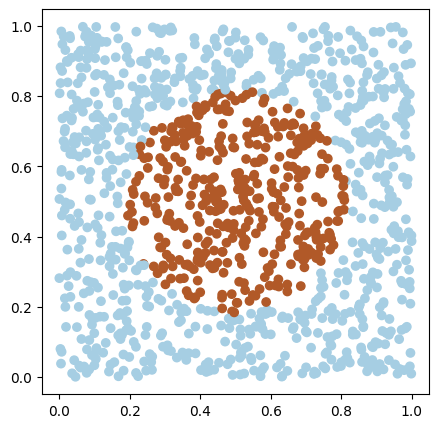

In [6]:
plt.figure (figsize=(5, 5))
plt.scatter(X.numpy()[:,0], X.numpy()[:,1], c=Y.numpy()[:,0],cmap=plt.cm.Paired)        
plt.show()

In [7]:
loss      = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.5, momentum=0.8)

In [8]:
def fit(model, X,Y, batch_size=100, train=True):    
    model.train(train)                                 
    sumL, sumA, numB = 0, 0, int( len(X)/batch_size ) 

    for i in range(0, numB*batch_size, batch_size):          
        xb = X[i: i+batch_size]                          
        yb = Y[i: i+batch_size]                          

        y = model(xb)                                    
        L = loss(y, yb)                                  

        if train:                                        
            optimizer.zero_grad()                                
            L.backward()                                             
            optimizer.step()                             

        sumL += L.item()                                 
        sumA += (y.round() == yb).float().mean()         

    return sumL/numB,  sumA/numB   

In [9]:
print( "before:      loss: %.4f accuracy: %.4f" %  fit(model, X,Y) )
 
epochs = 1000                                            
for epoch in range(epochs):                              
    L,A = fit(model, X, Y)                               
     
    if epoch % 100 == 0 or epoch == epochs-1:                 
        print(f'epoch: {epoch:5d} loss: {L:.4f} accuracy: {A:.4f}' ) 

before:      loss: 0.6318 accuracy: 0.6775
epoch:     0 loss: 0.6301 accuracy: 0.6775
epoch:   100 loss: 0.6277 accuracy: 0.6775
epoch:   200 loss: 0.4221 accuracy: 0.7600
epoch:   300 loss: 0.0745 accuracy: 0.9683
epoch:   400 loss: 0.0522 accuracy: 0.9800
epoch:   500 loss: 0.0499 accuracy: 0.9767
epoch:   600 loss: 0.0400 accuracy: 0.9825
epoch:   700 loss: 0.0405 accuracy: 0.9817
epoch:   800 loss: 0.0406 accuracy: 0.9817
epoch:   900 loss: 0.0390 accuracy: 0.9825
epoch:   999 loss: 0.0382 accuracy: 0.9825


In [10]:
print(model)

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=5, out_features=4, bias=True)
  (3): Sigmoid()
  (4): Linear(in_features=4, out_features=1, bias=True)
  (5): Sigmoid()
)


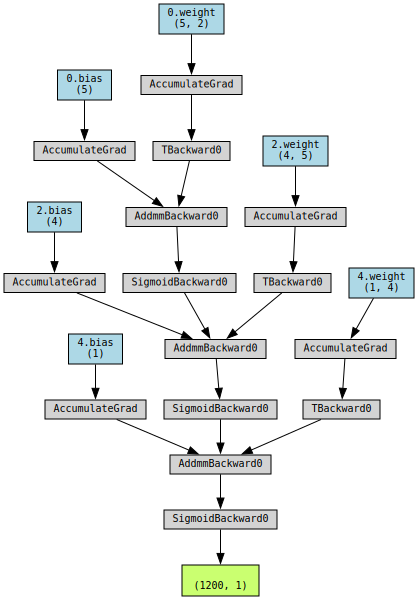

In [11]:
torchviz.make_dot(model(X), params = dict(model.named_parameters()))

In [12]:
loss      = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.5)

In [13]:
print( "before:      loss: %.4f accuracy: %.4f" %  fit(model, X,Y) )
 
epochs = 1000                                            
for epoch in range(epochs):                              
    L,A = fit(model, X, Y)                               
     
    if epoch % 100 == 0 or epoch == epochs-1:                 
        print(f'epoch: {epoch:5d} loss: {L:.4f} accuracy: {A:.4f}' ) 

before:      loss: 0.1661 accuracy: 0.8292
epoch:     0 loss: 0.0850 accuracy: 0.9108
epoch:   100 loss: 0.0593 accuracy: 0.9233
epoch:   200 loss: 0.0301 accuracy: 0.9550
epoch:   300 loss: 0.0179 accuracy: 0.9767
epoch:   400 loss: 0.0159 accuracy: 0.9817
epoch:   500 loss: 0.0517 accuracy: 0.9425
epoch:   600 loss: 0.0404 accuracy: 0.9533
epoch:   700 loss: 0.0382 accuracy: 0.9567
epoch:   800 loss: 0.0482 accuracy: 0.9492
epoch:   900 loss: 0.0377 accuracy: 0.9550
epoch:   999 loss: 0.0274 accuracy: 0.9675


In [15]:
print(model)

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=5, out_features=4, bias=True)
  (3): Sigmoid()
  (4): Linear(in_features=4, out_features=1, bias=True)
  (5): Sigmoid()
)


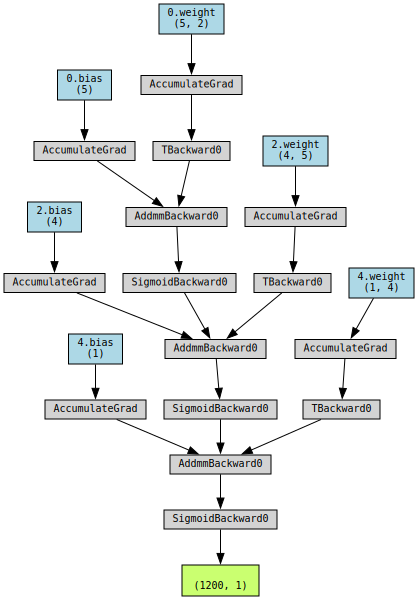

In [14]:
torchviz.make_dot(model(X), params = dict(model.named_parameters()))

При оцінці похибки за допомогою Mean Squared Error похибка одразу була меншою і зменшувалася більш різко ніж з використанням Binary Cross Entropy. Проте точність при використанні оптимізатора стохастичного градієнтного спуску виявилася трохи більшою ніж при використанні Adam.